In [86]:
#Importing the libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import Imputer, LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [87]:
#Importing the dataset
dataset = pd.read_csv("dataset.csv")

In [88]:
x = dataset.iloc[:,[4,5,6,7,8,9,10,12,13,14,15,18,20,22,23,24,25,26,29,32,34,35,40,42,44,45,46,48,50,51,52,53,54,55,56,57,65,67,68,69,70,74,80,81,82,83,84,85,86,87,89,92,93,96,97]]

I went through the dataset and observed that not all features are significant in determining the output. Some of the features have a lot of missing values, some are not really that important in determining the rating. So, only taking those features that are significant.

In [89]:
for i in range(len(x["Wireless Charging"])):
    if x["Wireless Charging"][i]!="yes":
        x["Wireless Charging"][i]="no"

/home/ninadc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ninadc/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3267: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


Here, the 'Wireless Charging' feature have 'yes' in some rows and remaining rows are NaN. After observing this feature alongside 'model name' feature , it can be observed that the rows having 'yes' in 'Wireless Charging' are the only ones really having Wireless Charging and rest don't thus, replacing all those rows with 'no'.

In [90]:
#Taking care of NaN values
x = x.replace(np.nan,'',regex=True)

Replacing the NaN values by empty string. This is because during Label Encoding the NaN values are considered as floats while rest of the rows are strings thus arising error. Now, that NaN values are replaced by empty strings they are given value 0 during Label Encoding.

In [91]:
x.head(6)

,Aspect Ratio,Audio Features,Audio Jack,Autofocus,Bezel-less display,Bluetooth,Brand,Build Material,Camera Features,Capacity,...,USB Connectivity,USB OTG Support,USB Type-C,User Available Storage,User Replaceable,Video Recording,Waterproof,Weight,Width,Wireless Charging
0,19:9,,3.5 mm,Phase Detection autofocus,yes,v5.0,Xiaomi,,"Digital Zoom, Auto Flash, Face detection, Touc...",4000 mAh,...,"Mass storage device, USB charging, microUSB 2.0",yes,,Up to 52.3 GB,No,1920x1080 @ 30 fps,,182 grams Below Average ▾Weight compared to11 ...,76.4 mm,no
1,19:9,,3.5 mm,Phase Detection autofocus,yes,v4.2,Realme,,"2 x Digital Zoom, Auto Flash, Face detection, ...",4230 mAh,...,"Mass storage device, USB charging, microUSB 2.0",yes,,Up to 23.2 GB,No,1920x1080 @ 30 fps,,168 grams Average ▾Weight compared to8 - 12 K ...,75.6 mm,no
2,19.5:9,,3.5 mm,yes,yes,v4.2,Realme,,"2 x Digital Zoom, Auto Flash, Face detection, ...",3500 mAh,...,"Mass storage device, USB charging, microUSB 2.0",yes,,,No,,,168 grams Average ▾Weight compared to10 - 14 K...,74 mm,no
3,18.5:9,Dolby Atmos,3.5 mm,No,yes,v5.0,Samsung,,"Digital Zoom, Auto Flash, Face detection, Touc...",3300 mAh,...,"Mass storage device, USB charging, microUSB 2.0",yes,,Up to 49.2 GB,No,1920x1080 @ 30 fps,,169 grams Average ▾Weight compared to15 - 23 K...,76.8 mm,no
4,19.5:9,,3.5 mm,Phase Detection autofocus,yes,v4.2,Honor,,"Digital Zoom, Auto Flash, Face detection, Touc...",3750 mAh,...,"Mass storage device, USB charging, microUSB 2.0",yes,,Up to 53.3 GB,No,1920x1080 @ 60 fps,,175 grams Below Average ▾Weight compared to12 ...,76.6 mm,no
5,,,,,,,,,,,...,,,,,,,,,,no


In [92]:
#Label Encoding x for each feature
for i in range(55):
    le = LabelEncoder()
    x.iloc[:,i] = le.fit_transform(x.iloc[:,i])

Label Encoding is done so that the string values are changed to numeric or float values. If string values are kept as they are then error arises during fitting.

In [93]:
x.head(6)

,Aspect Ratio,Audio Features,Audio Jack,Autofocus,Bezel-less display,Bluetooth,Brand,Build Material,Camera Features,Capacity,...,USB Connectivity,USB OTG Support,USB Type-C,User Available Storage,User Replaceable,Video Recording,Waterproof,Weight,Width,Wireless Charging
0,7,0,1,7,1,9,45,0,26,76,...,5,2,0,75,1,3,0,228,102,0
1,7,0,1,7,1,8,37,0,6,83,...,5,2,0,32,1,3,0,179,94,0
2,6,0,1,13,1,8,37,0,6,68,...,5,2,0,0,1,0,0,173,80,0
3,2,1,1,6,1,9,39,0,26,61,...,5,2,0,55,1,3,0,183,106,0
4,6,0,1,7,1,8,10,0,26,74,...,5,2,0,81,1,6,0,206,104,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
#Fixing missing values
imputer = Imputer(missing_values = 0, strategy = "mean", axis = 0)
imputer = imputer.fit(x.iloc[:,0:])
x.iloc[:,0:] = imputer.transform(x.iloc[:,0:])

/home/ninadc/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


The Imputer changes the value specified in the missing_values parameter by some another value. This value is calculated by using the strategy specified in the strategy parameter. In this case the rows having value 0 are replaced by the mean of the non-zero values of their columns. axis = 0 specifies mean of the column is to be taken.

In [95]:
x.head(6)

,Aspect Ratio,Audio Features,Audio Jack,Autofocus,Bezel-less display,Bluetooth,Brand,Build Material,Camera Features,Capacity,...,USB Connectivity,USB OTG Support,USB Type-C,User Available Storage,User Replaceable,Video Recording,Waterproof,Weight,Width,Wireless Charging
0,7.000000,1.666667,1.000000,7.000000,1.0,9.000000,45.000000,5.401961,26.000000,76.000000,...,5.000000,2.000000,1.0,75.000000,1.000000,3.00000,8.75,228.000000,102.000000,1.0
1,7.000000,1.666667,1.000000,7.000000,1.0,8.000000,37.000000,5.401961,6.000000,83.000000,...,5.000000,2.000000,1.0,32.000000,1.000000,3.00000,8.75,179.000000,94.000000,1.0
2,6.000000,1.666667,1.000000,13.000000,1.0,8.000000,37.000000,5.401961,6.000000,68.000000,...,5.000000,2.000000,1.0,47.013423,1.000000,3.91791,8.75,173.000000,80.000000,1.0
3,2.000000,1.000000,1.000000,6.000000,1.0,9.000000,39.000000,5.401961,26.000000,61.000000,...,5.000000,2.000000,1.0,55.000000,1.000000,3.00000,8.75,183.000000,106.000000,1.0
4,6.000000,1.666667,1.000000,7.000000,1.0,8.000000,10.000000,5.401961,26.000000,74.000000,...,5.000000,2.000000,1.0,81.000000,1.000000,6.00000,8.75,206.000000,104.000000,1.0
5,3.887255,1.666667,1.107872,8.633634,1.0,7.470085,26.963277,5.401961,23.474138,52.364407,...,6.175074,1.970213,1.0,47.013423,1.207715,3.91791,8.75,141.430769,73.479412,1.0


In [96]:
y = dataset.iloc[:,-1]
y

0      4.5
1      4.5
2      4.4
3      4.3
4      4.4
5      4.4
6      4.5
7      4.3
8      4.1
9      4.3
10     4.5
11     4.5
12     4.0
13     4.4
14     4.4
15     4.4
16     4.4
17     4.5
18     4.4
19     4.4
20     4.4
21     4.4
22     4.5
23     4.4
24     4.3
25     4.2
26     4.3
27     4.3
28     4.6
29     4.4
      ... 
325    3.9
326    4.4
327    4.3
328    4.1
329    4.1
330    3.9
331    3.4
332    3.3
333    3.9
334    4.0
335    4.4
336    4.5
337    4.2
338    3.8
339    3.7
340    4.2
341    4.1
342    4.0
343    3.9
344    3.7
345    4.2
346    4.0
347    3.6
348    3.6
349    4.4
350    3.8
351    3.9
352    4.1
353    3.6
354    4.3
Name: Rating, Length: 355, dtype: float64

In [97]:
#Making the values of Dependent Variable binary
for i in range(len(y)):
    if y[i]>=4.0:
        y[i]=1
    else:
        y[i]=0

/home/ninadc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/ninadc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Considering that people will buy Phones having rating >= 4.0

In [98]:
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
5      1.0
6      1.0
7      1.0
8      1.0
9      1.0
10     1.0
11     1.0
12     1.0
13     1.0
14     1.0
15     1.0
16     1.0
17     1.0
18     1.0
19     1.0
20     1.0
21     1.0
22     1.0
23     1.0
24     1.0
25     1.0
26     1.0
27     1.0
28     1.0
29     1.0
      ... 
325    0.0
326    1.0
327    1.0
328    1.0
329    1.0
330    0.0
331    0.0
332    0.0
333    0.0
334    1.0
335    1.0
336    1.0
337    1.0
338    0.0
339    0.0
340    1.0
341    1.0
342    1.0
343    0.0
344    0.0
345    1.0
346    1.0
347    0.0
348    0.0
349    1.0
350    0.0
351    0.0
352    1.0
353    0.0
354    1.0
Name: Rating, Length: 355, dtype: float64

In [99]:
#Splitting data into training set and testing set
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [105]:
#Preparation for plotting
xtrain_plot = xtrain["Rating Count"]
xtest_plot = xtest["Rating Count"]

In [156]:
#Feature Scaling
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

In [192]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [193]:
grid={
    'min_samples_split':[4,5,6],
    'max_leaf_nodes':[100,400,100],
    'criterion':['entropy']
}

In [194]:
#Applying Grid Search
classifier=GridSearchCV(
    estimator=RandomForestClassifier(),
    cv=5,#cross validation
    scoring='accuracy',
    refit=True,
    param_grid=grid
)

In [195]:
#Fitting classifier to the training set
classifier.fit(xtrain,ytrain)

/home/ninadc/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ninadc/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ninadc/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ninadc/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ninadc/anaconda3/lib/python3.7/site-pa

/home/ninadc/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ninadc/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ninadc/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ninadc/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ninadc/anaconda3/lib/python3.7/site-pa

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': [4, 5, 6], 'max_leaf_nodes': [100, 400, 100], 'criterion': ['entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [196]:
ypred = classifier.predict(xtest)

In [197]:
from sklearn.metrics import accuracy_score

In [198]:
print(accuracy_score(ytest,ypred))

0.8591549295774648


In [199]:
#Printing the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, ypred)

array([[16,  8],
       [ 2, 45]])

In [200]:
#printing the classification report
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

         0.0       0.89      0.67      0.76        24
         1.0       0.85      0.96      0.90        47

   micro avg       0.86      0.86      0.86        71
   macro avg       0.87      0.81      0.83        71
weighted avg       0.86      0.86      0.85        71



In [201]:
#Printing the Correlation Matrix
dataset.corr()

,PhoneId,Rating Count,Review Count,Rating
PhoneId,1.000000,-0.106290,-0.100276,-0.322881
Rating Count,-0.106290,1.000000,0.946453,0.155601
Review Count,-0.100276,0.946453,1.000000,0.120419
Rating,-0.322881,0.155601,0.120419,1.000000


In [202]:
#Preparation for printing the Labelled Confusion Matrix
l1 = [k for k in ytest]
l2 = [k for k in ypred]
data = {"Actual":l1, "Predicted":l2}
df = pd.DataFrame(data)

for i in range(len(df["Actual"])):
    if df["Actual"][i]==1.0:
        df["Actual"][i]="yes"
    else:
        df["Actual"][i]="no"

for i in range(len(df["Predicted"])):
    if df["Predicted"][i]==1.0:
        df["Predicted"][i]="yes"
    else:
        df["Predicted"][i]="no"        

df

/home/ninadc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/ninadc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/ninadc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ninadc/anaconda3/lib/python3.7/site

,Actual,Predicted
0,no,no
1,yes,yes
2,no,no
3,yes,yes
4,yes,yes
5,no,no
6,yes,yes
7,yes,yes
8,yes,yes
9,no,yes


Converting the rows having value 1 to 'yes' and those having value 0 to 'no'

In [203]:
#Labelled Confusion Matrix
pd.crosstab(index=df["Actual"],columns=df["Predicted"])

Predicted,no,yes
Actual,,
no,16,8
yes,2,45


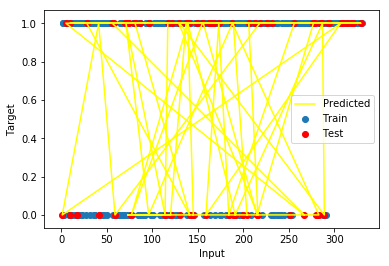

In [206]:
#Plotting the graph
import matplotlib.pyplot as plt
plt.scatter(xtrain_plot, ytrain, label="Train")
plt.scatter(xtest_plot, ytest, label="Test", color="RED")
plt.plot(xtest_plot, ypred, label="Predicted", color='Yellow')
plt.xlabel("Input")
plt.ylabel("Target")
plt.legend()
plt.show()